In [32]:
%cd '/content/drive/My Drive/NLP/amazon'

/content/drive/My Drive/NLP/amazon


In [33]:
!pip install fastai2 --quiet
!pip install kaggle --quiet

from fastai2.text.all import *

import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv('/content/drive/My Drive/NLP/amazon/amazonbooksreview.csv')


In [42]:
# Drop that Unnamed: 0, reviewerID, asin, reviewerName, helpful, summary, unixReviewTime, reviewTime  
data = data.drop('reviewTime', 1)
data.head()

,reviewText,overall
0,Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,5.0
1,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is rather simplistically written, but the message behind it is so powerful that you have to read it. It will take you to enlightenment.",5.0
2,"This book provides a reflection that you can apply to your own life.And, a way for you to try and assess whether you are truly doing the right thing and making the most of your short time on this plane.",5.0
3,"I first read THE PROPHET in college back in the 60's. The book had a revival as did anything metaphysical in the turbulent 60's. It had a profound effect on me and became a book I always took with me. After graduation I joined the Peace Corps and during stressful training in country (Liberia) at times of illness and the night before I left, this book gave me great comfort. I read it before I married, just before and again after my children were born and again after two near fatal illnesses. I am always amazed that there is a chapter that reaches out to you, grabs you and offers both comfor...",5.0
4,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had the means to publish it a century or two earlier, he could have inspired a new religion.From the mouth of an old man about to sail away to a far away destination, we hear the wisdom of life and all important aspects of it. It is a messege. A guide book. A Sufi sermon. Much is put in perspective without any hint of a dogma. There is much that hints at his birth place, Lebanon where many of the old prophets walked the Earth and where this book project f...",5.0


In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [44]:
train.count

<bound method DataFrame.count of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    reviewText  overall
1499  Possibly the best book I've read in nearly 20 years. An easy, yet difficult at the same time read, I found myself unable to put it down although there were parts so heart-wrenching, my eyes filled with tears throughout this realistically-written novel. Also, the movie based on this book is one of the very few which Hollywood did not completely 

In [45]:
train.head()

,reviewText,overall
1499,"Possibly the best book I've read in nearly 20 years. An easy, yet difficult at the same time read, I found myself unable to put it down although there were parts so heart-wrenching, my eyes filled with tears throughout this realistically-written novel. Also, the movie based on this book is one of the very few which Hollywood did not completely destroy (but PLEASE read the book first!).And guys, this isn't just some flaky chick-lit...my boyfriend read it with me (HIS idea!), finished it first, then hounded me to hurry up and finish reading it so he could discuss it with me. And he doesn't u...",5.0
5190,love this book too. arya's new found skills. dany's new power. the greenseer found. can't wait for knowing what bran can do. ah.. mr martin i hope your health is good and finish this series before anything happens to you!,5.0
73,Kahlil Gibran is a wonderful poet. He is a philosopher who meshes the bible with his prose. Very spiritual to read.,4.0
9426,"Harry Paget Flashman is a galloping good time. A true slacker for the ages. See how far a british soldier can get with a good ear for languages, fine horsemanship skills, and a heap of good luck. Learn how to apply the famous ""Flashy half-nelson"" which he employs whenever possible. (One hand squeezing her arse and t'other fondling one of her poonts) Reading any of the books in this series will buff up your knowledge of late 19th century history.",5.0
2327,I saw the preview for the movie and decided I would like to read it before I watched and I must say the book was better!! Gruen grasps your attention from the first page til the very end of it.. I would definitely recommend reading the book i enjoyed it thoroughly and will definitely be looking for more by Gruen!,5.0


In [46]:
train['reviewText'].value_counts()

I could not stop reading. As my first  KF download I can't wait to read more stories like this. I was dreaming about the book last night ... I could write the sequel.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [47]:
test.head()

,reviewText,overall
5907,"I didn't think A DANCE WITH DRAGONS was as bad as the 1-star reviews suggest but at the same time I think I'd be hard put to argue with any of them. The book is highly unsatisfying after a 6-year wait, which itself followed a promise (or ""devout hope"") that the book would be published shortly (as in the following year) after A FEAST FOR CROWS, which itself was about setup, only for an almost entirely different set of characters. So any dangling plot threads from that book continue to dangle a the conclusion of ADWD. As for the dangling threads in ADWD, it's intriguing stuff, I admit, but w...",3.0
5496,Martin pulls one surprise after another and man a great many shockers in the last 100 pages. Bring the 6th book out please - can hardly wait,5.0
1204,"This beautifully written novel opens with Jacob, age 93 or 90 - he doesn't remember which. The book flashes back and forth from Jacob's present life in an old-age home to his young adult life caring for animals in a traveling circus. Though a bit over the top, this story is so marvelously told that I found myself turning page after page savoring the prose.",4.0
820,"I purchased this book reluctantly, since it didn't sound like my ""cup of tea"". I mainly wanted to read it before I saw the movie, which is the order I like to do this, especially when I can see the movie and then refer back to the book to refresh my memory. But in spite of myself, I enjoyed the book very much, and read it into the late hours last night(and early morning) because I didn't want to go to sleep until I finished it!I like the way the author goes back and forth in time; it is well done and easy to follow - sometimes this device can get confusing if not properly handled! I'm n...",4.0
5059,Great book! Not quite as good as book 3 but still a great read! Can't wait for the next one!,4.0


In [48]:
txt = train['reviewText'].iloc[0]
txt


"Possibly the best book I've read in nearly 20 years. An easy, yet difficult at the same time read, I found myself unable to put it down although there were parts so heart-wrenching, my eyes filled with tears throughout this realistically-written novel. Also, the movie based on this book is one of the very few which Hollywood did not completely destroy (but PLEASE read the book first!).And guys, this isn't just some flaky chick-lit...my boyfriend read it with me (HIS idea!), finished it first, then hounded me to hurry up and finish reading it so he could discuss it with me. And he doesn't usually take an interest in anything that's not Lord of the Rings-esque.So, go forth, read and enjoy-I own both the book and the Kindle version-either way, it's a winner."

In [49]:
# Initializing the default tokenizer used in Fastai which is that of Spacy called `WordTokenizer`
spacy = WordTokenizer() 

# Wrapping the Spacy tokenizer with a custom Fastai function to make some custom changes to the tokenizer
tkn = Tokenizer(spacy) 

tkn(txt)


(#178) ['xxbos','xxmaj','possibly','the','best','book','xxmaj','i',"'ve",'read'...]

In [50]:
txts = L([i for i in train['reviewText']])
txts

(#8000) ["Possibly the best book I've read in nearly 20 years. An easy, yet difficult at the same time read, I found myself unable to put it down although there were parts so heart-wrenching, my eyes filled with tears throughout this realistically-written novel. Also, the movie based on this book is one of the very few which Hollywood did not completely destroy (but PLEASE read the book first!).And guys, this isn't just some flaky chick-lit...my boyfriend read it with me (HIS idea!), finished it first, then hounded me to hurry up and finish reading it so he could discuss it with me. And he doesn't usually take an interest in anything that's not Lord of the Rings-esque.So, go forth, read and enjoy-I own both the book and the Kindle version-either way, it's a winner.","love this book too. arya's new found skills. dany's new power. the greenseer found. can't wait for knowing what bran can do. ah.. mr martin i hope your health is good and finish this series before anything happens to you!"

In [51]:
# Setting up a tokenizer on the entire dataframe 'train'
tok = Tokenizer.from_df(train)
tok.setup(train)

toks = txts.map(tok)
toks[5]

(#603) ['xxbos','xxmaj','another','fantastic',',','mind','-','gripping','read',','...]

In [52]:
toks[10]

(#295) ['xxbos','i','was',"n't",'more','than','forty','pages','into','this'...]

In [53]:
tok.decode(toks[0])

"xxbos xxmaj possibly the best book xxmaj i 've read in nearly 20 years . xxmaj an easy , yet difficult at the same time read , i found myself unable to put it down although there were parts so heart - wrenching , my eyes filled with tears throughout this realistically - written novel . xxmaj also , the movie based on this book is one of the very few which xxmaj hollywood did not completely destroy ( but xxup please read the book first!).and guys , this is n't just some flaky chick - lit … my boyfriend read it with me ( his idea ! ) , finished it first , then hounded me to hurry up and finish reading it so he could discuss it with me . xxmaj and he does n't usually take an interest in anything that 's not xxmaj lord of the rings-esque.so , go forth , read and enjoy - i own both the book and the xxmaj kindle version - either way , it 's a winner ."

In [54]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10000]

tensor([   2,    8, 1099,    9,  152,   22,    8,   16,  171,   35,   18,  764,
        1232,  139,   11,    8,   45,  383,   10,  243,  512,   46,    9,  221,
          76,   35,   10,   16,  164,  309, 1488,   15,  162,   19,  142,  317,
          59,   90,  444,   44,  533,   29, 3411,   10,   58,  738, 1010,   26,
        1994,  507,   20, 4695,   29,  134,   91,   11,    8,  114,   10,    9,
         189,  538,   37,   20,   22,   17,   42,   13,    9,   72,  188,  101,
           8, 2054,   86,   32,  483, 2936,   52,   28,    7,  863,   35,    9,
          22,    0,  796,   10,   20,   17,   38,   64,   73,    0, 5423,   29,
        3990,  100,   58, 6469,   35,   19,   26,   66,   52,   33,  540,   63,
          53,   10,  374,   19,   81,   10,  129,    0,   66,   15, 3323,   78,
          12,  361,   85,   19,   44,   34,   97, 2657,   19,   26,   66,   11,
           8,   12,   34,  111,   38,  620,  235,   45,  375,   18,  310,   21,
          23,   32,    8,  898,   13,   

In [55]:
num.encodes(toks[0])

TensorText([   2,    8, 1099,    9,  152,   22,    8,   16,  171,   35,   18,  764,
        1232,  139,   11,    8,   45,  383,   10,  243,  512,   46,    9,  221,
          76,   35,   10,   16,  164,  309, 1488,   15,  162,   19,  142,  317,
          59,   90,  444,   44,  533,   29, 3411,   10,   58,  738, 1010,   26,
        1994,  507,   20, 4695,   29,  134,   91,   11,    8,  114,   10,    9,
         189,  538,   37,   20,   22,   17,   42,   13,    9,   72,  188,  101,
           8, 2054,   86,   32,  483, 2936,   52,   28,    7,  863,   35,    9,
          22,    0,  796,   10,   20,   17,   38,   64,   73,    0, 5423,   29,
        3990,  100,   58, 6469,   35,   19,   26,   66,   52,   33,  540,   63,
          53,   10,  374,   19,   81,   10,  129,    0,   66,   15, 3323,   78,
          12,  361,   85,   19,   44,   34,   97, 2657,   19,   26,   66,   11,
           8,   12,   34,  111,   38,  620,  235,   45,  375,   18,  310,   21,
          23,   32,    8,  898,   13

In [56]:
num.decode(nums[0][:100])

(#100) ['xxbos','xxmaj','possibly','the','best','book','xxmaj','i',"'ve",'read'...]

In [57]:
# dataset for fine-tuning language model which only needs the text data
df_lm = pd.concat([train, test], axis=0)[['reviewText']]
df_lm.head()

,reviewText
1499,"Possibly the best book I've read in nearly 20 years. An easy, yet difficult at the same time read, I found myself unable to put it down although there were parts so heart-wrenching, my eyes filled with tears throughout this realistically-written novel. Also, the movie based on this book is one of the very few which Hollywood did not completely destroy (but PLEASE read the book first!).And guys, this isn't just some flaky chick-lit...my boyfriend read it with me (HIS idea!), finished it first, then hounded me to hurry up and finish reading it so he could discuss it with me. And he doesn't u..."
5190,love this book too. arya's new found skills. dany's new power. the greenseer found. can't wait for knowing what bran can do. ah.. mr martin i hope your health is good and finish this series before anything happens to you!
73,Kahlil Gibran is a wonderful poet. He is a philosopher who meshes the bible with his prose. Very spiritual to read.
9426,"Harry Paget Flashman is a galloping good time. A true slacker for the ages. See how far a british soldier can get with a good ear for languages, fine horsemanship skills, and a heap of good luck. Learn how to apply the famous ""Flashy half-nelson"" which he employs whenever possible. (One hand squeezing her arse and t'other fondling one of her poonts) Reading any of the books in this series will buff up your knowledge of late 19th century history."
2327,I saw the preview for the movie and decided I would like to read it before I watched and I must say the book was better!! Gruen grasps your attention from the first page til the very end of it.. I would definitely recommend reading the book i enjoyed it thoroughly and will definitely be looking for more by Gruen!


In [58]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('reviewText', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) 
    # using only 10% of entire comments data for validation inorder to learn more
)


AttributeError: ignored

In [59]:
dls_lm = dls_lm.dataloaders(df_lm, bs=64, seq_len=72)

In [60]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos i read this book in a day . i simply could not put it down . xxmaj it was so dark , with just a touch of goodness , which in itself was even complex . xxmaj the love aspect of the story was so muddied , and heart wrenching , it made me feel for xxmaj jacob and for xxmaj marlena . xxmaj how confusing it all xxunk this story","i read this book in a day . i simply could not put it down . xxmaj it was so dark , with just a touch of goodness , which in itself was even complex . xxmaj the love aspect of the story was so muddied , and heart wrenching , it made me feel for xxmaj jacob and for xxmaj marlena . xxmaj how confusing it all xxunk this story is"
1,"a xxmaj martian sunset on black - and - purple sand dune , or watching a xxunk pushing its way through a xxmaj martian storm . xxmaj there is also some of the culture of xxmaj california in this book , as in all xxunk , with the buildings glittering with glass and the sun and sand xxunk have said that the politics in this book are xxunk heavy handed . xxmaj","xxmaj martian sunset on black - and - purple sand dune , or watching a xxunk pushing its way through a xxmaj martian storm . xxmaj there is also some of the culture of xxmaj california in this book , as in all xxunk , with the buildings glittering with glass and the sun and sand xxunk have said that the politics in this book are xxunk heavy handed . xxmaj compared"
2,"me into xxmaj jacob 's reality . i experienced so many emotions along with the various characters , and at times felt i could strangle xxmaj august for what he put xxmaj rosie , xxmaj marlena and xxmaj jacob xxunk memorable line which made me smile : "" not only am i unemployed and homeless , but i also have a pregnant woman , bereaved dog , elephant , and eleven horses","into xxmaj jacob 's reality . i experienced so many emotions along with the various characters , and at times felt i could strangle xxmaj august for what he put xxmaj rosie , xxmaj marlena and xxmaj jacob xxunk memorable line which made me smile : "" not only am i unemployed and homeless , but i also have a pregnant woman , bereaved dog , elephant , and eleven horses to"


In [61]:
# Saving the dataloader for fast use in the future

torch.save(dls_lm, '/content/drive/My Drive/NLP/amazon/amazonbooks_lm.pkl')


In [62]:
# To load the Dataloaders in the future

dls_lm = torch.load('/content/drive/My Drive/NLP/amazon/amazonbooks_lm.pkl')


In [63]:
#fine-tuning wikitext LM to disaster tweets dataset

learn = language_model_learner(
    dls_lm, AWD_LSTM,drop_mult=0.5,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [64]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(16032, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(16032, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=16032, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=1.0964781722577754e-06)

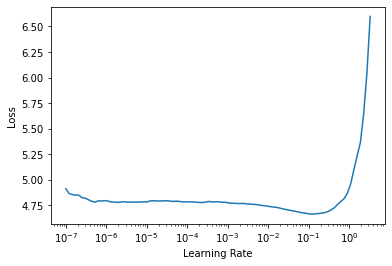

In [65]:
learn.lr_find()

In [66]:
learn.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.149351,3.832343,0.289882,46.170570,04:52


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.853729,3.709522,0.305242,40.834263,05:40
1,3.764350,3.649481,0.312087,38.454716,05:39
2,3.622282,3.611260,0.316860,37.012665,05:38
3,3.478463,3.596321,0.319076,36.463840,05:39
4,3.411231,3.596090,0.319783,36.455425,05:38


In [67]:
learn.save_encoder('/content/drive/My Drive/NLP/amazon/finetuned')


In [69]:
blocks = (TextBlock.from_df('reviewText', seq_len=dls_lm.seq_len, max_vocab=6000), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('overall'),
                splitter=RandomSplitter(0.1))


In [70]:
dls = dls.dataloaders(train, bs=32)

In [71]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj yes , it 's been a long wait . xxmaj to tell the truth , it 's been a very long wait . a wait that has xxunk g xxrep 3 r xxunk and xxunk , a wait that saw a lot of xxunk thrown the author 's way . a wait that has raised expectations to a level that is a little bit scary , if you ask me . a wait that 's been made much more difficult given the fact that the latest volume , a xxmaj feast for xxmaj crows , was n't received as well as its xxunk , the questions on everyone 's xxunk are : xxmaj will a xxmaj dance xxmaj with xxmaj dragons be worth the wait , and can the book possibly live up to the xxunk expectations this xxunk wait xxunk . xxmaj well , it is with",4.0
1,xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4.0
2,xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,3.0


In [ ]:
len(dls.train_ds), len(dls.valid_ds)

(6400, 1600)

In [ ]:
path = '/content/drive/My Drive/NLP/'
torch.save(dls_lm, path+'amazonbooks_dls_cls.pkl')

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=[accuracy, FBeta(beta=1)]).to_fp16()
learn.load_encoder('finetuned')

In [ ]:
learn.fit_one_cycle(1, 1e-2)

ValueError: ignored

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2))

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-2))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),3e-3))


In [ ]:
learn.save('final_model')

In [ ]:
%cd '/content/drive/My Drive/NLP'

/content/drive/My Drive/NLP


In [ ]:
!pip install fastai2 --quiet
!pip install kaggle --quiet

from fastai2.text.all import *

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/NLP/amazonbooksreview.csv')
#test = pd.read_csv('/content/drive/My Drive/NLP/test.csv')

In [ ]:
data = data.drop('unixReviewTime', 1)
data.head()

,reviewText,overall
0,Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,5.0
1,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is rather simplistically written, but the message behind it is so powerful that you have to read it. It will take you to enlightenment.",5.0
2,"This book provides a reflection that you can apply to your own life.And, a way for you to try and assess whether you are truly doing the right thing and making the most of your short time on this plane.",5.0
3,"I first read THE PROPHET in college back in the 60's. The book had a revival as did anything metaphysical in the turbulent 60's. It had a profound effect on me and became a book I always took with me. After graduation I joined the Peace Corps and during stressful training in country (Liberia) at times of illness and the night before I left, this book gave me great comfort. I read it before I married, just before and again after my children were born and again after two near fatal illnesses. I am always amazed that there is a chapter that reaches out to you, grabs you and offers both comfor...",5.0
4,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had the means to publish it a century or two earlier, he could have inspired a new religion.From the mouth of an old man about to sail away to a far away destination, we hear the wisdom of life and all important aspects of it. It is a messege. A guide book. A Sufi sermon. Much is put in perspective without any hint of a dogma. There is much that hints at his birth place, Lebanon where many of the old prophets walked the Earth and where this book project f...",5.0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [ ]:
train.count

<bound method DataFrame.count of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    reviewText  overall
4961  Read the middle 4 books of the Wheel of Time series again... and DON'T DO THAT.  I say this because you are well on your way to writing a WoT clone in a bad way - you started brilliantly but are now lost, characters are standing around saying "what's my motivation?" (you're a Hollywood guy now... you know what I'm talking about).  Dragons are o

In [ ]:
train.head()

,reviewText,overall
4961,"Read the middle 4 books of the Wheel of Time series again... and DON'T DO THAT. I say this because you are well on your way to writing a WoT clone in a bad way - you started brilliantly but are now lost, characters are standing around saying ""what's my motivation?"" (you're a Hollywood guy now... you know what I'm talking about). Dragons are on vacation in the hills, or maybe they stomped off to their trailer in a huff (of smoke). Get Tyrion off his party barge and send him to a celeb detox program so he gets his personality back (worked for Ironman). Get the wolves of Winterfell howlin...",3.0
8409,"This is, simply, a very entertaining book. It has a great story line that is both suspensfull and surprising. Paterson gets into his character (Alex Cross) like no other. Writing, story line, and characters all develop well and come together smoothly. Cool Beans!",4.0
4809,Not Jon Snow. Martin kills all I care about. I honk I skipped every other word to try to see what was going to happen!,4.0
3121,"Controversy has swirled around Ernest Hemingway's masterpiece since the day it was published. ""For Whom the Bell Tolls"" was nominated for the Pulitzer Prize in 1941 and the Pulitzer committee agreed unanimously to name the book as the winner of the fiction category. Board president Nicholas Murray Butler, however, overruled the committee on the grounds that he felt the book to be profane and offensive. No award in the fiction category was given that year. The Pulitzer committee, sans Butler, did go on to award Hemingway in 1953 for ""The Old Man and the Sea."" Butler has since been widely cr...",5.0
8831,I wondered at a file size of 362 kb and length of 8 pages. A mass market paperback costing $12.88 for 8 pages?? Sosemthing's not right here. Especially with all those awards. I rarely purchase a book of less than 10 pages - even for free but I took a chance and bought the book. Page 8 (on my Kindle) goes from location 93 to 1873. Page 8 just never ends. I'm glad I took the chance.I'm reading it now so can't give a proper review but I wanted to let people know that this is more than 6 pages long. So far I'm enjoying the story.,3.0


In [ ]:
train['reviewText'].value_counts()

Any early Hill effort which develops so slowly it is better as a sleep aid than a thriller.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
test.head()

,reviewText,summary
665,I really loved this book. I saw the movie before the book but it was one that once I saw the movie had to read the book.,Great
9831,"The characters in this book are, for the most part, absolutely disgusting. I felt guilty reading it, like I was reading some trash romance novel and I think I'll hide it the bookcase in the back of the house so no one who comes over sees it... but I have to say, it's a definate page turner. Well over 600 pages read in two days. And I'll probably read the sequel sometime soon. It's not the most well-written book, but it will definately hold your attention for a little guilty pleasure.",Trashy...
2512,"Water for Elephants came highly recommended from several friends but it fell a little short of great. The writing is good, but the love story is a little lacking. In my opinion, Jacob and Marlena did not have enough scenes together for me to truly believe that they were falling in love. I know the title is ""Water for Elephants,"" but there was a little too much about the animals in this book and not enough about the people. I know it was about the circus but I guess I'm the type who likes a better-developed love story if I'm going to ""buy"" it. I don't want it to sound like I disliked t...",Engaging enough
9362,"I enjoy an occasional well written who-done-it. And Scottoline is usually one I pick. But this one did not measure up to her other work. Yet, still a decent read.",not one of her best
1980,"This is not normally the kind of book I would read. I knew going in that it was going to be gritty and depressing; what a shame it would have been If I kept letting that stop from reading this masterpeice. It is going to be a while before I find another book as enchanting as this one. I highly suggest you to give it a try, I think it will be well worth it.",Facinating..


In [ ]:
txt = train['reviewText'].iloc[0]
txt


'Read the middle 4 books of the Wheel of Time series again... and DON\'T DO THAT.  I say this because you are well on your way to writing a WoT clone in a bad way - you started brilliantly but are now lost, characters are standing around saying "what\'s my motivation?" (you\'re a Hollywood guy now... you know what I\'m talking about).  Dragons are on vacation in the hills, or maybe they stomped off to their trailer in a huff (of smoke).  Get Tyrion off his party barge and send him to a celeb detox program so he gets his personality back (worked for Ironman).  Get the wolves of Winterfell howling... you know they want to.  And tell me that Jon somehow survived his Et tu, Brute moment... because he\'s the only intersting character at the Wall right now!Don\'t follow in Jordan\'s footsteps and write 4 books where the characters do NOTHING of note (well yours do die, but that\'s not the kind of \'of note\' I\'m talking about)... you\'ve got one already with aDwD, stop now!  You\'ve got a L

In [ ]:
# Initializing the default tokenizer used in Fastai which is that of Spacy called `WordTokenizer`
spacy = WordTokenizer() 

# Wrapping the Spacy tokenizer with a custom Fastai function to make some custom changes to the tokenizer
tkn = Tokenizer(spacy) 

tkn(txt)


(#259) ['xxbos','xxmaj','read','the','middle','4','books','of','the','xxmaj'...]

In [ ]:
txts = L([i for i in train['reviewText']])
txts

(#8000) ['Read the middle 4 books of the Wheel of Time series again... and DON\'T DO THAT.  I say this because you are well on your way to writing a WoT clone in a bad way - you started brilliantly but are now lost, characters are standing around saying "what\'s my motivation?" (you\'re a Hollywood guy now... you know what I\'m talking about).  Dragons are on vacation in the hills, or maybe they stomped off to their trailer in a huff (of smoke).  Get Tyrion off his party barge and send him to a celeb detox program so he gets his personality back (worked for Ironman).  Get the wolves of Winterfell howling... you know they want to.  And tell me that Jon somehow survived his Et tu, Brute moment... because he\'s the only intersting character at the Wall right now!Don\'t follow in Jordan\'s footsteps and write 4 books where the characters do NOTHING of note (well yours do die, but that\'s not the kind of \'of note\' I\'m talking about)... you\'ve got one already with aDwD, stop now!  You\'v

In [ ]:
# Setting up a tokenizer on the entire dataframe 'train'
tok = Tokenizer.from_df(train)
tok.setup(train)

toks = txts.map(tok)
toks[5]

(#442) ['xxbos','xxmaj','i',"'m",'currently','a','bit','hooked','on','classic'...]

In [ ]:
toks[1000]

(#299) ['xxbos','xxmaj','overall',',','i','enjoyed','it','.','xxmaj','historical'...]

In [ ]:
tok.decode(toks[0])


'xxbos xxmaj read the middle 4 books of the xxmaj wheel of xxmaj time series again … and xxup do n\'t xxup do xxup that . i say this because you are well on your way to writing a wot clone in a bad way - you started brilliantly but are now lost , characters are standing around saying " what \'s my motivation ? " ( you \'re a xxmaj hollywood guy now … you know what xxmaj i \'m talking about ) . xxmaj dragons are on vacation in the hills , or maybe they stomped off to their trailer in a huff ( of smoke ) . xxmaj get xxmaj tyrion off his party barge and send him to a celeb detox program so he gets his personality back ( worked for xxmaj ironman ) . xxmaj get the wolves of xxmaj winterfell howling … you know they want to . xxmaj and tell me that xxmaj jon somehow survived his xxmaj et tu , xxmaj brute moment … because he \'s the only intersting character at the xxmaj wall right now!don\'t follow in xxmaj jordan \'s footsteps and write 4 books where the characters do xxup nothing of note ( 

In [ ]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10000]

tensor([    2,     8,    20,    17,    10,   416,    10,    14,    72,   419,
           22,    11,     8,    19,    58,    14,    90,    40,   406,    21,
           17,   198,     0,    12,  1356,    11,     8,     0,   344,    89,
           33,   112,    52,   557,     8,   422,    53,    61,   105,    97,
           11,     8,   158,    10,    40,   406,    10,    12,    50,    43,
         1470,    83,    12,   217,   383,  3381,    11,     8,  2126,     8,
        10189,    63])

In [ ]:
num.encodes(toks[0])

TensorText([    2,     8,    34,     9,   556,   320,    62,    13,     9,     8,
         2422,    13,     8,    76,    78,   214,    99,    12,     7,    66,
           38,     7,    66,     7,    21,    11,    16,   183,    20,   119,
           31,    35,    83,    37,   171,   115,    15,   158,    14,  6894,
            0,    18,    14,   267,   115,    28,    31,   357,  2652,    29,
           35,   161,   370,    10,    50,    35,  2653,   254,   957,    30,
           57,    23,    56,  3296,   110,    30,    52,    31,   310,    14,
            8,  2193,   689,   161,    99,    31,   132,    57,     8,    16,
          156,  1030,    49,    53,    11,     8,   268,    35,    37,  3380,
           18,     9,  3708,    10,    59,   390,    75,     0,   181,    15,
          103,  6020,    18,    14,     0,    52,    13,  6895,    53,    11,
            8,   109,     8,   426,   181,    33,  1744, 11835,    12,  2833,
          127,    15,    14,     0, 11836,  5374,    45,    

In [ ]:
num.decode(nums[0][:100])

(#100) ['xxbos','xxmaj','read','the','middle','4','books','of','the','xxmaj'...]

In [ ]:
# dataset for fine-tuning language model which only needs the text data
df_lm = pd.concat([train, test], axis=0)[['reviewText']]
df_lm.head()

,reviewText
4961,"Read the middle 4 books of the Wheel of Time series again... and DON'T DO THAT. I say this because you are well on your way to writing a WoT clone in a bad way - you started brilliantly but are now lost, characters are standing around saying ""what's my motivation?"" (you're a Hollywood guy now... you know what I'm talking about). Dragons are on vacation in the hills, or maybe they stomped off to their trailer in a huff (of smoke). Get Tyrion off his party barge and send him to a celeb detox program so he gets his personality back (worked for Ironman). Get the wolves of Winterfell howlin..."
8409,"This is, simply, a very entertaining book. It has a great story line that is both suspensfull and surprising. Paterson gets into his character (Alex Cross) like no other. Writing, story line, and characters all develop well and come together smoothly. Cool Beans!"
4809,Not Jon Snow. Martin kills all I care about. I honk I skipped every other word to try to see what was going to happen!
3121,"Controversy has swirled around Ernest Hemingway's masterpiece since the day it was published. ""For Whom the Bell Tolls"" was nominated for the Pulitzer Prize in 1941 and the Pulitzer committee agreed unanimously to name the book as the winner of the fiction category. Board president Nicholas Murray Butler, however, overruled the committee on the grounds that he felt the book to be profane and offensive. No award in the fiction category was given that year. The Pulitzer committee, sans Butler, did go on to award Hemingway in 1953 for ""The Old Man and the Sea."" Butler has since been widely cr..."
8831,I wondered at a file size of 362 kb and length of 8 pages. A mass market paperback costing $12.88 for 8 pages?? Sosemthing's not right here. Especially with all those awards. I rarely purchase a book of less than 10 pages - even for free but I took a chance and bought the book. Page 8 (on my Kindle) goes from location 93 to 1873. Page 8 just never ends. I'm glad I took the chance.I'm reading it now so can't give a proper review but I wanted to let people know that this is more than 6 pages long. So far I'm enjoying the story.


In [ ]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('reviewText', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) 
    # using only 10% of entire comments data for validation inorder to learn more
)

In [ ]:
dls_lm = dls_lm.dataloaders(df_lm, bs=64, seq_len=72)

In [ ]:
dls_lm.show_batch(max_n=100)

,text,text_
0,xxbos a truly fascinating novel - for those of us old enough to remember going to the circus in small towns during the summer and now old enough to share the anxiety and depression of aging it covered the whole gamut . xxmaj only the treatment of both animals and those on the low end of the pay scale could be considered distracting from the good memories . xxbos intriguing and it,a truly fascinating novel - for those of us old enough to remember going to the circus in small towns during the summer and now old enough to share the anxiety and depression of aging it covered the whole gamut . xxmaj only the treatment of both animals and those on the low end of the pay scale could be considered distracting from the good memories . xxbos intriguing and it keeps
1,"the momentum of the social revolution , during xxmaj spain 's war against fascism -- and xxmaj xxunk . xxmaj still , then as now , some accommodation with party politics appears inevitable for many xxunk , to advance situations xxunk to elusive goals of autonomy and mutual aid beyond unions or xxunk and the xxmaj xxunk , with xxmaj xxunk 's early attempt , similar to xxmaj spain 's at a","momentum of the social revolution , during xxmaj spain 's war against fascism -- and xxmaj xxunk . xxmaj still , then as now , some accommodation with party politics appears inevitable for many xxunk , to advance situations xxunk to elusive goals of autonomy and mutual aid beyond unions or xxunk and the xxmaj xxunk , with xxmaj xxunk 's early attempt , similar to xxmaj spain 's at a sustained"
2,note that some might find interesting ( as i did ) is that xxmaj martin said that books six and seven will not contain any new xxup pov characters excluding the xxmaj prologue and xxmaj epilogue . xxmaj so if nothing else you wo n't have that problem going xxunk note of interest is that the critical reviews for this one have been very good while reviews on amazon have been less,that some might find interesting ( as i did ) is that xxmaj martin said that books six and seven will not contain any new xxup pov characters excluding the xxmaj prologue and xxmaj epilogue . xxmaj so if nothing else you wo n't have that problem going xxunk note of interest is that the critical reviews for this one have been very good while reviews on amazon have been less than
3,"novel , but xxmaj gruen is a true master of tying them all together at the end . xxmaj unlike xxmaj nicholas xxmaj sparks 's xxunk xxmaj notebook , this one is believable , right down to xxmaj jacob and xxmaj marlena 's love xxunk , you can choose how you want to take my brief little review , but either way , look at the ratings . 2 , xxrep 3",", but xxmaj gruen is a true master of tying them all together at the end . xxmaj unlike xxmaj nicholas xxmaj sparks 's xxunk xxmaj notebook , this one is believable , right down to xxmaj jacob and xxmaj marlena 's love xxunk , you can choose how you want to take my brief little review , but either way , look at the ratings . 2 , xxrep 3 0"
4,"xxmaj as another reader said , the book is definitely successful as a thought experiment ; i believe this expresses in the most accurate way my impression from & ' red xxmaj mars , & ' as well as the other books in the series . xxmaj in any case , reading this book made me curious enough to continue with the next books on the series ( green xxmaj mars ,","as another reader said , the book is definitely successful as a thought experiment ; i believe this expresses in the most accurate way my impression from & ' red xxmaj mars , & ' as well as the other books in the series . xxmaj in any case , reading this book made me curious enough to continue with the next books on the series ( green xxmaj mars , xxmaj"
5,"believable , for as minor a character as she was . xxmaj true , the villains ( uncle xxmaj al , xxmaj august ) were likewise a bit "" xxunk , "" but i can forgive a lack of character development for certain secondary characters because , after all , a

In [ ]:
# Saving the dataloader for fast use in the future

torch.save(dls_lm, '/content/drive/My Drive/NLP/amazon/amazonbooks_lm.pkl')


In [ ]:
# To load the Dataloaders in the future

dls_lm = torch.load('/content/drive/My Drive/NLP/amazon/amazonbooks_lm.pkl')


In [ ]:
#fine-tuning wikitext LM to disaster tweets dataset

learn = language_model_learner(
    dls_lm, AWD_LSTM,drop_mult=0.5,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [ ]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(16032, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(16032, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=16032, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=1.5848931980144698e-06)

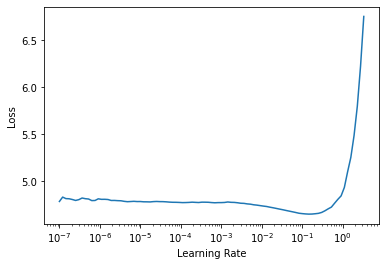

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.137038,3.829844,0.293528,46.055363,01:14


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.870088,3.709284,0.308995,40.824558,01:18
1,3.749200,3.655197,0.314257,38.675125,01:16
2,3.630778,3.618108,0.318827,37.267002,01:14
3,3.494414,3.604385,0.321280,36.759068,01:15
4,3.408637,3.604892,0.322001,36.777721,01:15


In [ ]:
learn.save_encoder('finetuned')


In [ ]:
blocks = (TextBlock.from_df('reviewText', seq_len=dls_lm.seq_len, max_vocab=6000), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('overall'),
                splitter=RandomSplitter(0.1))
dls

In [ ]:
dls = dls.dataloaders(train, bs=64)

In [ ]:
dls.show_batch(max_n=100)

,text,category
0,"xxbos xxmaj at the end of "" a xxmaj feast for xxmaj crows "" ( affc ) we could read : "" tyrion , xxmaj jon , xxmaj xxunk … .. will be along next year ( i xxunk hope ) in a xxmaj dance with xxmaj dragons ( adwd ) , which will focus on the events along the xxmaj wall and across the sea , just as the present book focused on xxmaj king 's xxunk xxmaj xxunk xxunk , to justify that just xxunk pages of xxup affc took 5 years to be written , xxunk tells us that xxup adwd was xxup already finished . xxmaj he merely had to publish the available material in two books instead of xxunk as we all know , xxup adwd did n't come the next year nor the year after . xxmaj the book "" already written "" in",1.0
1,"xxbos xxmaj can a whole life be lived in just four days ? xxmaj this is the question that xxunk xxmaj robert xxmaj jordan throughout xxup for xxup whom xxup the xxup bell xxup tolls . xxmaj leaving behind his respectable life as an xxmaj american college xxmaj spanish - language teacher , he has become an accomplished guerrilla fighter and explosives expert fighting for the anti - fascists in the xxmaj spanish xxmaj civil xxmaj war . xxmaj can he really find a new "" family , "" fall head over xxunk in love , and strike a blow that will further the rebel cause and lay his own personal ghosts to rest … in just four days ? xxmaj well , he 's going to give it one xxunk try , because when that fourth day arrives , he is sure there will be no xxunk so ,",5.0
2,xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxbos xxmaj as archives and witnesses,5.0
3,xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1.0
4,xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad x

In [ ]:
len(dls.train_ds), len(dls.valid_ds)

(6400, 1600)

In [ ]:
path = '/content/drive/My Drive/NLP/'
torch.save(dls_lm, path+'amazonbooks_dls_cls.pkl')

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=[accuracy, FBeta(beta=1)]).to_fp16()
learn.load_encoder('finetuned')

In [ ]:
learn.fit_one_cycle(1, 1e-2)

ValueError: ignored

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2))

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-2))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),3e-3))


In [ ]:
learn.save('final_model')